# Risk Case Study

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import yfinance as yf

# Data Collection

In [14]:
tickers = ['AAPL', 'MSFT', 'SPY']

In [18]:
data = yf.download(tickers, period="2y", auto_adjust=True, progress=False)
close_prices = data['Close']

# Calculate Returns

In [28]:
returns = close_prices.pct_change().dropna()
returns.head()

Ticker,AAPL,MSFT,SPY
Date,,,
2023-09-21,-0.008889,-0.003866,-0.016528
2023-09-22,0.004944,-0.007887,-0.002248
2023-09-25,0.007380,0.001672,0.004205
2023-09-26,-0.023398,-0.017006,-0.014691
2023-09-27,-0.008897,0.002082,0.000399


In [30]:
long_returns = returns.reset_index().melt(
    id_vars="Date",
    var_name="Ticker",
    value_name="Returns"
)

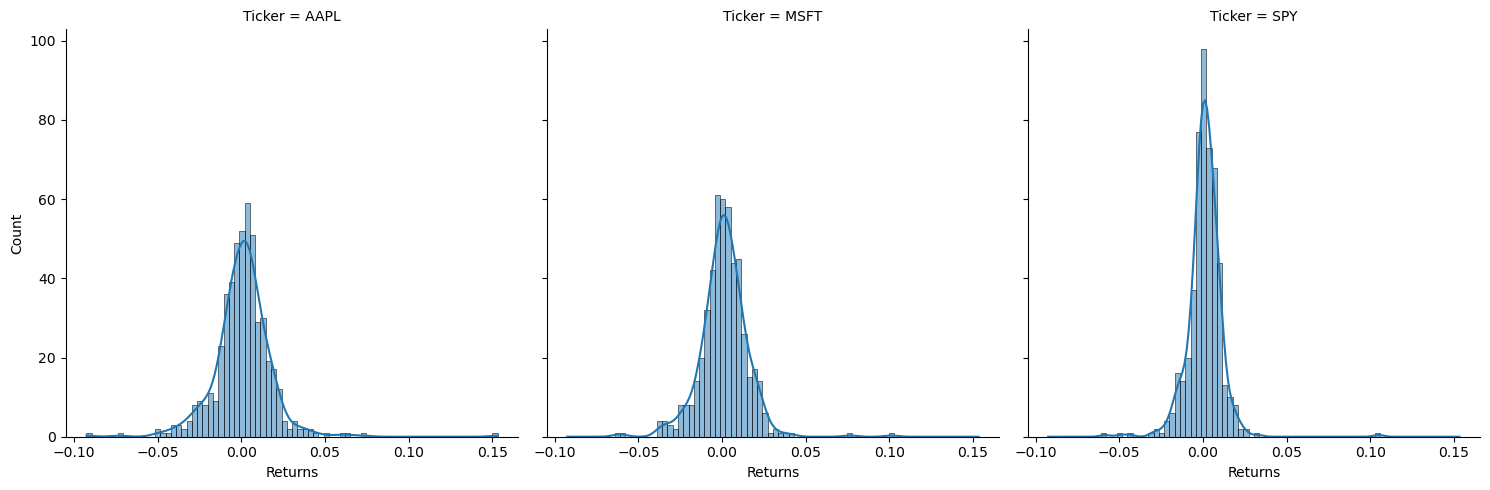

In [33]:
sns.displot(
    data=long_returns,
    x="Returns",
    col="Ticker",
    kde=True
);

# Basic Descriptive Stats

In [25]:
return_mean = returns.mean()
return_vol = returns.std()